In [64]:
import os
from datetime import datetime

from netCDF4 import Dataset
import spacepy.pycdf
import h5py
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re

import libs_cleo

plt.rcParams['figure.figsize'] = [20, 5]  # 设置图形的默认尺寸为20x5英寸

In [65]:
# ssies3
ssies3_infos = pd.DataFrame()
ssies3_infos['fp'] = libs_cleo.return_suffix_file_paths(r"G:\0_postgraduate\DMSP\data\2014\f16\ssies3")
days = []
for fp in ssies3_infos['fp']:
    pattern = r"G:\\0_postgraduate\\DMSP\\data\\2014\\f16\\ssies3\\dmsp-f16_ssies-3_thermal-plasma_2014(\d{4})"
    match = re.search(pattern,fp)
    days.append(match.group(1))
ssies3_infos['day'] = days
# ssm
ssm_fps = libs_cleo.return_suffix_file_paths(r"G:\0_postgraduate\DMSP\data\2014\f16\ssm")
ssm_infos = pd.DataFrame()
ssm_infos['fps'] = ssm_fps
days = []
for fp in ssm_infos['fps']:
    pattern = r"G:\\0_postgraduate\\DMSP\\data\\2014\\f16\\ssm\\dmsp-f16_ssm_magnetometer_2014(\d{4})"
    match = re.search(pattern,fp)
    days.append(match.group(1))
ssm_infos['day'] = days

In [59]:
for fp_ssies3,day_ssies3 in zip(ssies3_infos['fp'],ssies3_infos['day']):
    for fp_ssm,day_ssm in zip(ssm_infos['fp'],ssm_infos['day']):
        if day_ssies3 == day_ssm:
            try:
                # Object CDFFile
                ssies3 = libs_cleo.CDFFile(fp_ssies3)
                ssm = libs_cleo.CDFFile(fp_ssm)
                # data
                data_ssies3 = ssies3.ssies3_data()
                data_ssm = ssm.ssm_data()
                # v set nan
                vx_set_nan = ssies3.vx_set_nan()
                vy_set_nan = ssies3.v_yz_set_nan(v_str='vy')
                vz_set_nan = ssies3.v_yz_set_nan(v_str='vz')
                # ssm clip
                st = data_ssies3['timestamps'].iloc[0]
                et = data_ssies3['timestamps'].iloc[-1]
                s_idx = np.where(data_ssm['timestamps']==st)
                e_idx = np.where(data_ssm['timestamps']==et)
                data_ssm_1 = data_ssm.iloc[s_idx[0][0]:e_idx[0][0]+1].reset_index(drop=True)
                # draw
                # x
                fig,ax = plt.subplots(figsize=(20, 5))
                ax.plot(vx_set_nan['Epoch'],vx_set_nan['vx'],label='v_ram')
                ax.plot(data_ssm_1['Epoch'],data_ssm_1['DELTA_B_SC_y'],label='delta_b_ram')
                # ax.plot(data_ssm_1['Epoch'],data_ssm_1['DELTA_B_SC_ORIG_y'],label='delta_b_orig_x')
                ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,15,30,45]))  # 只在某些时刻显示刻度
                ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # 格式化显示格式
                # 在x=0处添加一条红色虚线
                ax.axhline(y=0, color='red', linestyle='--', label='y = 0')
                ax.legend()
                ax.set_title(f'{day_ssies3},x direction, ssies3_ssm_v_b')
                fig_save_path = r"G:\0_postgraduate\DMSP\fig\ssies3_ssm_v_b\x"
                if not os.path.exists(fig_save_path):
                    os.makedirs(fig_save_path)
                save_fig_path = os.path.join(fig_save_path,f"ssies3_ssm_v_b_x_{day_ssies3}.png")
                fig.savefig(save_fig_path)
                plt.close(fig)
                print(f"ssies3_ssm_v_b_x_{day_ssies3}.png already save.")
                # y
                fig,ax = plt.subplots(figsize=(20, 5))
                ax.plot(vy_set_nan['Epoch'],-vy_set_nan['vy'],label='v_ATRight')
                ax.plot(data_ssm_1['Epoch'],data_ssm_1['DELTA_B_SC_z'],label='delta_b_ATRight')
                # ax.plot(data_ssm_1['Epoch'],data_ssm_1['DELTA_B_SC_ORIG_z'],label='delta_b_orig_y')
                ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,15,30,45]))  # 只在某些时刻显示刻度
                ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # 格式化显示格式
                # 在x=0处添加一条红色虚线
                ax.axhline(y=0, color='red', linestyle='--', label='y = 0')
                ax.legend()
                # save
                fig_save_path = r"G:\0_postgraduate\DMSP\fig\ssies3_ssm_v_b\y"
                if not os.path.exists(fig_save_path):
                    os.makedirs(fig_save_path)
                save_fig_path = os.path.join(fig_save_path,f"ssies3_ssm_v_b_y_{day_ssies3}.png")
                fig.savefig(save_fig_path)
                plt.close(fig)
                print(f"ssies3_ssm_v_b_y_{day_ssies3}.png already save.")
                # z
                fig,ax = plt.subplots(figsize=(20, 5))
                ax.plot(vz_set_nan['Epoch'],-vz_set_nan['vz'],label='v_nadir')
                ax.plot(data_ssm_1['Epoch'],data_ssm_1['DELTA_B_SC_x'],label='delta_b_nadir')
                # ax.plot(data_ssm_1['Epoch'],data_ssm_1['DELTA_B_SC_ORIG_x'],label='delta_b_orig_z')
                ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,15,30,45]))  # 只在某些时刻显示刻度
                ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # 格式化显示格式
                # 在x=0处添加一条红色虚线
                ax.axhline(y=0, color='red', linestyle='--', label='y = 0')
                ax.legend()
                # save
                fig_save_path = r"G:\0_postgraduate\DMSP\fig\ssies3_ssm_v_b\z"
                if not os.path.exists(fig_save_path):
                    os.makedirs(fig_save_path)
                save_fig_path = os.path.join(fig_save_path,f"ssies3_ssm_v_b_z_{day_ssies3}.png")
                fig.savefig(save_fig_path)
                plt.close(fig)
                print(f"ssies3_ssm_v_b_z_{day_ssies3}.png already save.")
            except Exception as e:
                print(e)

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [23]:
ssies3 = libs_cleo.CDFFile(fp_ssies3)
ssm = libs_cleo.CDFFile(fp_ssm)

In [24]:
data_ssies3 = ssies3.ssies3_data()
data_ssm = ssm.ssm_data()

In [25]:
vx_set_nan = ssies3.vx_set_nan()
vy_set_nan = ssies3.v_yz_set_nan(v_str='vy')
vz_set_nan = ssies3.v_yz_set_nan(v_str='vz')

In [26]:
st = data_ssies3['timestamps'].iloc[0]
et = data_ssies3['timestamps'].iloc[-1]
s_idx = np.where(data_ssm['timestamps']==st)
e_idx = np.where(data_ssm['timestamps']==et)
data_ssm_1 = data_ssm.iloc[s_idx[0][0]:e_idx[0][0]+1].reset_index(drop=True)

In [27]:
# 对读取的数据进行检验
# data_ssies3['vz'].plot(),vz_set_nan['vz'].plot()

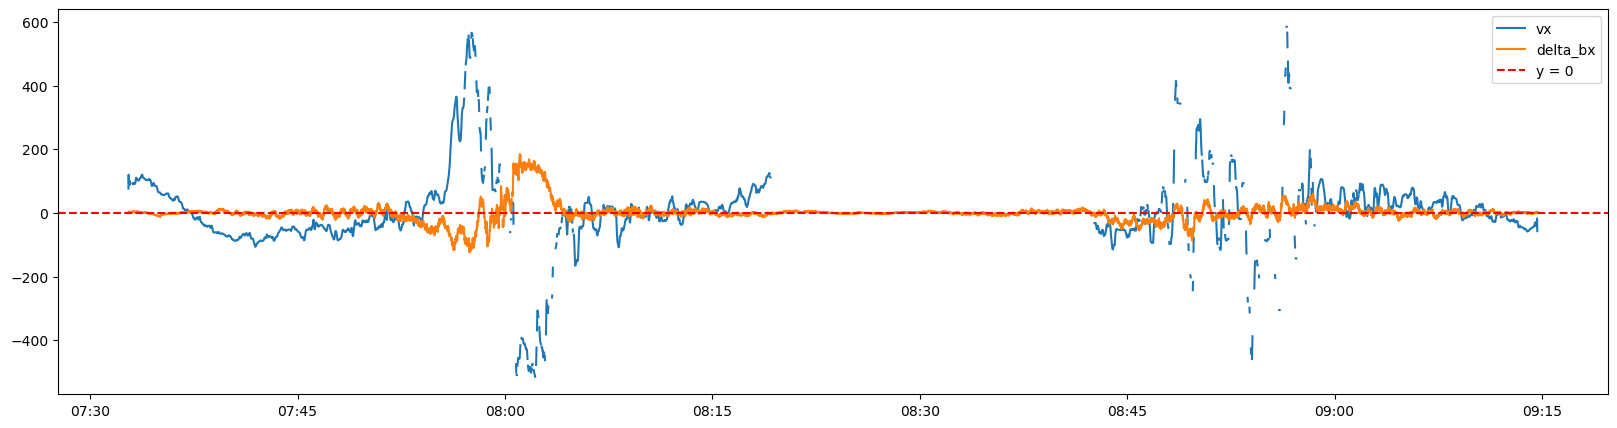

In [28]:
fig,ax = plt.subplots(figsize=(20, 5))
ax.plot(vx_set_nan['Epoch'],vx_set_nan['vx'],label='vx')
ax.plot(data_ssm_1['Epoch'],data_ssm_1['DELTA_B_SC_y'],label='delta_bx')
# ax.plot(data_ssm_1['Epoch'],data_ssm_1['DELTA_B_SC_ORIG_y'],label='delta_b_orig_x')
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,15,30,45]))  # 只在某些时刻显示刻度
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # 格式化显示格式
# 在x=0处添加一条红色虚线
ax.axhline(y=0, color='red', linestyle='--', label='y = 0')
ax.legend()

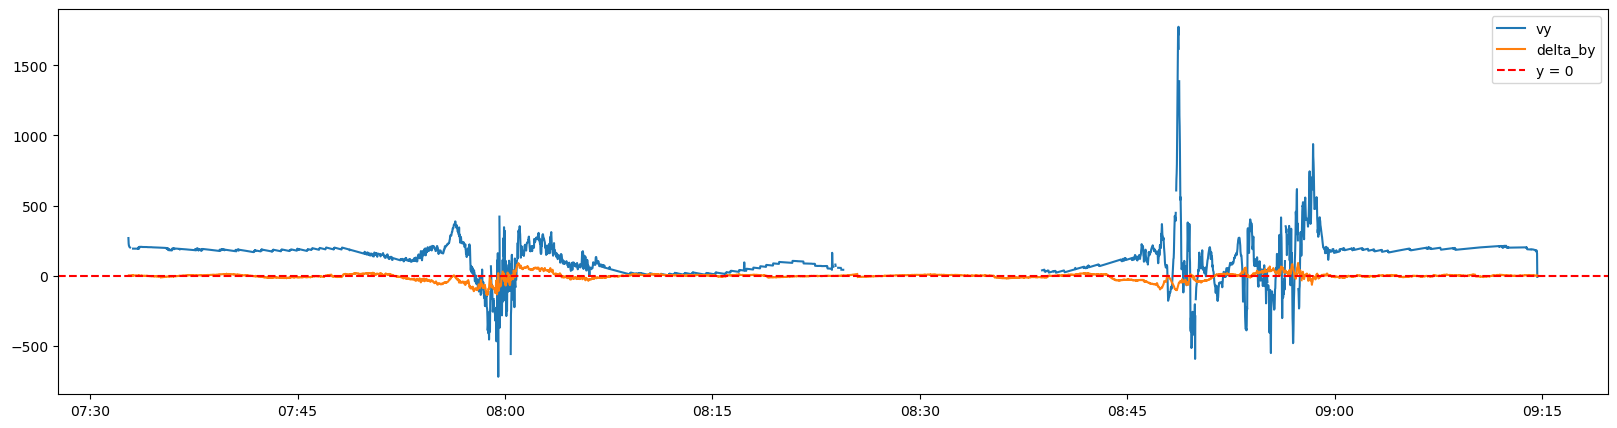

In [29]:
fig,ax = plt.subplots(figsize=(20, 5))
ax.plot(vy_set_nan['Epoch'],vy_set_nan['vy'],label='vy')
ax.plot(data_ssm_1['Epoch'],data_ssm_1['DELTA_B_SC_z'],label='delta_by')
# ax.plot(data_ssm_1['Epoch'],data_ssm_1['DELTA_B_SC_ORIG_z'],label='delta_b_orig_y')
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,15,30,45]))  # 只在某些时刻显示刻度
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # 格式化显示格式
# 在x=0处添加一条红色虚线
ax.axhline(y=0, color='red', linestyle='--', label='y = 0')
ax.legend()

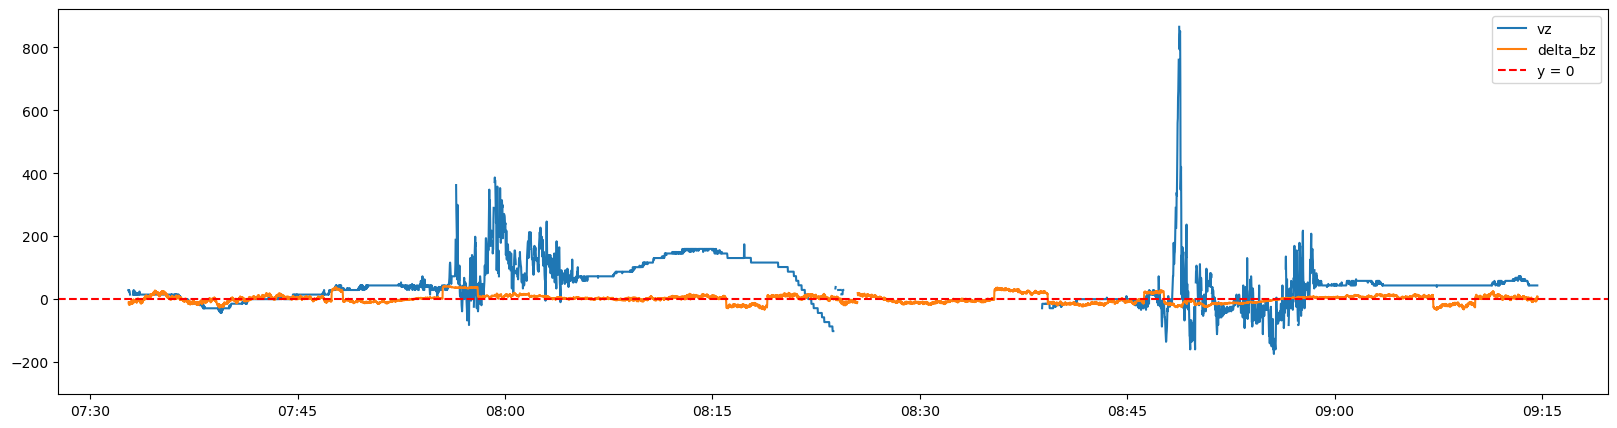

In [30]:
fig,ax = plt.subplots(figsize=(20, 5))
ax.plot(vz_set_nan['Epoch'],vz_set_nan['vz'],label='vz')
ax.plot(data_ssm_1['Epoch'],data_ssm_1['DELTA_B_SC_x'],label='delta_bz')
# ax.plot(data_ssm_1['Epoch'],data_ssm_1['DELTA_B_SC_ORIG_x'],label='delta_b_orig_z')
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,15,30,45]))  # 只在某些时刻显示刻度
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # 格式化显示格式
# 在x=0处添加一条红色虚线
ax.axhline(y=0, color='red', linestyle='--', label='y = 0')
ax.legend()